# Houses Kaggle Competition (Deep Learning ) 

## (0) Libraries and imports

In [95]:
%load_ext autoreload
%autoreload 2

# DATA MANIPULATION
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# VIEWING OPTIONS IN THE NOTEBOOK
from sklearn import set_config; set_config(display='diagram')
from sklearn.model_selection import train_test_split

#Preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

#Deeplearning 
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## (1) Getting Started

### (1.1) Load the datasets

💾 Let's load the **training dataset**

In [28]:
data = pd.read_csv("train.csv")
X = data.drop(columns='SalePrice')
y = data['SalePrice']

In [29]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [31]:
X.shape, y.shape

((1460, 80), (1460,))

### (1.2) Train/Val Split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 80), (438, 80), (1022,), (438,))

### (1.3) Preprocessor

In [32]:
def create_preproc_ordinal():
    feat_ordinal_dict = {
        # considers "missing" as the worse category
        "BsmtCond": ['missing', 'Po', 'Fa', 'TA', 'Gd'],
        "BsmtExposure": ['missing', 'No', 'Mn', 'Av', 'Gd'],
        "BsmtFinType1": ['missing', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
        "BsmtFinType2": ['missing', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
        "BsmtQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
        "Electrical": ['missing', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
        "ExterCond": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        "ExterQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
        "Fence": ['missing', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
        "FireplaceQu": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        "Functional": ['missing', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
        "GarageCond": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        "GarageFinish": ['missing', 'Unf', 'RFn', 'Fin'],
        "GarageQual": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        "HeatingQC": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        "KitchenQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
        "LandContour": ['missing', 'Low', 'Bnk', 'HLS', 'Lvl'],
        "LandSlope": ['missing', 'Sev', 'Mod', 'Gtl'],
        "LotShape": ['missing', 'IR3', 'IR2', 'IR1', 'Reg'],
        "PavedDrive": ['missing', 'N', 'P', 'Y'],
        "PoolQC": ['missing', 'Fa', 'Gd', 'Ex'],
    }

    feat_ordinal = sorted(feat_ordinal_dict.keys())
    feat_ordinal_values_sorted = [feat_ordinal_dict[i] for i in feat_ordinal]

    encoder_ordinal = OrdinalEncoder(
        categories=feat_ordinal_values_sorted,
        handle_unknown="use_encoded_value",
        unknown_value=-1  # Considers unknown values as worse than "missing"
    )

    preproc_ordinal = make_pipeline(
        SimpleImputer(strategy="constant", fill_value="missing"),
        encoder_ordinal,
        MinMaxScaler()
    )

    return preproc_ordinal, feat_ordinal


def create_preproc_numerical():
    return make_pipeline(
        KNNImputer(),
        MinMaxScaler()
    )

def create_preproc_nominal():
    return make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore")
    )

def create_preproc(X, percentile = 75):
    """Create an (unfitted) sklearn preprocessing pipeline well suited for the Houses Kaggle Competition

    Args:
        X (pandas.DataFrame): Feature matrix
        percentile (float): Percentage of feature to keep after one hot encoding

    Returns:
        sklearn.pipeline.Pipeline: un-fitted preprocessor
    """
    preproc_ordinal, feat_ordinal = create_preproc_ordinal()
    
    preproc_numerical = create_preproc_numerical()
    feat_numerical = sorted(X.select_dtypes(
        include=["int64", "float64"]).columns)
    
    preproc_nominal = create_preproc_nominal()
    feat_nominal = sorted(
        list(set(X.columns) - set(feat_numerical) - set(feat_ordinal)))
    
    feature_transformer = ColumnTransformer(
        [
        ("numerical_encoder", preproc_numerical, feat_numerical),
        ("ordinal_encoder", preproc_ordinal, feat_ordinal),
        ("nominal_encoder", preproc_nominal, feat_nominal)
        ],
        remainder="drop")

    feature_selector = SelectPercentile(
        mutual_info_regression,
        percentile=percentile,  # keep the xx% most important features
    )

    preproc = make_pipeline(
        feature_transformer,
        feature_selector
    )
    return preproc

In [33]:
preproc = create_preproc(X_train)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x7f486361eb90>))])

 **Scaling numerical features and encoding the categorical features** 

In [34]:
# Fit the preprocessor on the train set
preproc.fit(X_train, y_train)

#transform train and test set
X_train_preproc = preproc.transform(X_train)
X_test_preproc = preproc.transform(X_test)



In [35]:
X_train_preproc.shape, X_test_preproc.shape, X_test_preproc.shape

((1022, 159), (438, 159), (438, 159))

## (2)   Tensorflow/Keras

### (2.1) Predicting the houses' prices using a Neural Network

In [112]:
def initialize_model(X,adam):
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    model = Sequential()
    
    #first layer
    model.add(layers.Dense(30, activation='relu',input_dim =X.shape[-1]))
    
    #hidden layers
        
    model.add(layers.Dense(20, activation='relu'))
    
    
    model.add(layers.Dense(10, activation='relu'))

    
    #output layer
              
    model.add(layers.Dense(1,activation='linear'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='msle', 
                  optimizer=adam, metrics=['mae']) 

    return model 


In [131]:

# 1. Initializing a NeuralNet with its architecture and its compilation method
    

adam = Adam(learning_rate=0.001)
    
model = initialize_model(X_train_preproc,adam)
    
es = EarlyStopping(patience =10,restore_best_weights = True)

#2. Fitting the model

history = model.fit(
    X_train_preproc, 
    y_train, 
    validation_split = 0.3,
    shuffle = True,
    batch_size = 16, 
    epochs = 1000, 
    callbacks = [es], 
    verbose = 0)
    


In [136]:
# 3. Evaluating the model
res = model.evaluate(X_test_preproc, y_test, verbose=0)
print(f"The RMSLE is: {res[0]**0.5}")

The RMSLE is: 0.13956791216678366


`plot_history` to detect overfitting

In [137]:
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('RMSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

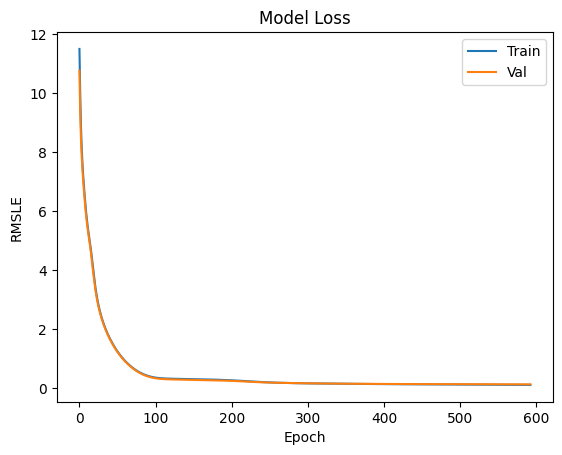

In [138]:
plot_history(history)

In [139]:
# 4. Looking at the lowest loss
minimium_rmlse_val = min(history.history['val_loss'])**0.5
optimal_momentum = np.argmin(history.history['val_loss'])

print(f"Lowest RMLSE achieved = {round(minimium_rmlse_val,3)}")
print(f"This was achieved at the epoch number {optimal_momentum}") 

Lowest RMLSE achieved = 0.127
This was achieved at the epoch number 582


## (3) 🏅SUBMISSION

💾 Let's also load the **test set**

In [140]:
X_test = pd.read_csv("test.csv")

In [141]:
X_test.shape

(1459, 80)

In [142]:
X_test_preproc = preproc.transform(X_test)

In [143]:
#Predict y_test

predictions = model.predict(X_test_preproc)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step


In [144]:
predictions

array([[111653.18],
       [143736.31],
       [173953.81],
       ...,
       [151563.11],
       [117533.6 ],
       [198624.66]], dtype=float32)

💾 Save predictions

In [145]:
results = pd.concat([
                        X_test["Id"], 
                        pd.Series(predictions[:,0], name="SalePrice")
                    ],
                    axis=1)
results

,Id,SalePrice
0,1461,111653.179688
1,1462,143736.312500
2,1463,173953.812500
3,1464,189057.468750
4,1465,200094.656250
...,...,...
1454,2915,70497.742188
1455,2916,58346.511719
1456,2917,151563.109375
1457,2918,117533.601562


📤  Export results using Kaggle's submission format and submit it online!


In [146]:
results.to_csv("submission_final.csv", header = True, index = False)